## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  17.564421   874.362251  0.531225  1.347896  1.450506
1  31.307043   628.369258  0.634355  3.066510  1.286822
2  23.414644   777.278711  0.367209  1.556854  1.380155
3  48.552073  1155.550399  0.953701  7.746384  1.547825
4  53.348095  1094.528439  0.258649  8.509765  1.394286


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 0.9116962	total: 56.1ms	remaining: 56s
1:	learn: 0.9046329	total: 57.4ms	remaining: 28.6s
2:	learn: 0.8958542	total: 59.2ms	remaining: 19.7s
3:	learn: 0.8885347	total: 60.5ms	remaining: 15.1s
4:	learn: 0.8780999	total: 61.4ms	remaining: 12.2s
5:	learn: 0.8692451	total: 62.5ms	remaining: 10.4s
6:	learn: 0.8588584	total: 63.3ms	remaining: 8.97s
7:	learn: 0.8496367	total: 64.1ms	remaining: 7.95s
8:	learn: 0.8424242	total: 64.8ms	remaining: 7.14s
9:	learn: 0.8349668	total: 65.5ms	remaining: 6.49s
10:	learn: 0.8260341	total: 66.2ms	remaining: 5.95s
11:	learn: 0.8168336	total: 67.1ms	remaining: 5.52s
12:	learn: 0.8065829	total: 67.9ms	remaining: 5.15s
13:	learn: 0.7968929	total: 68.6ms	remaining: 4.83s
14:	learn: 0.7878096	total: 69.4ms	remaining: 4.55s
15:	learn: 0.7788704	total: 70.5ms	remaining: 4.34s
16:	learn: 0.7709679	total: 71.4ms	remaining: 4.13s
17:	learn: 0.7639822	total: 72.2ms	remaining: 3.94s
18:	learn: 0.7576076	total: 72.9ms	remaining: 3.76s
19:	learn: 0.7494577	tot

60:	learn: 0.5070958	total: 98ms	remaining: 1.51s
61:	learn: 0.5027584	total: 98.6ms	remaining: 1.49s
62:	learn: 0.4981749	total: 99.3ms	remaining: 1.48s
63:	learn: 0.4938144	total: 99.9ms	remaining: 1.46s
64:	learn: 0.4881085	total: 101ms	remaining: 1.45s
65:	learn: 0.4833951	total: 101ms	remaining: 1.43s
66:	learn: 0.4791184	total: 101ms	remaining: 1.41s
67:	learn: 0.4744291	total: 102ms	remaining: 1.4s
68:	learn: 0.4701461	total: 102ms	remaining: 1.38s
69:	learn: 0.4658318	total: 103ms	remaining: 1.36s
70:	learn: 0.4621212	total: 103ms	remaining: 1.35s
71:	learn: 0.4571269	total: 104ms	remaining: 1.34s
72:	learn: 0.4537276	total: 105ms	remaining: 1.33s
73:	learn: 0.4496835	total: 105ms	remaining: 1.32s
74:	learn: 0.4469474	total: 106ms	remaining: 1.31s
75:	learn: 0.4431893	total: 107ms	remaining: 1.3s
76:	learn: 0.4393718	total: 107ms	remaining: 1.28s
77:	learn: 0.4350029	total: 108ms	remaining: 1.27s
78:	learn: 0.4317710	total: 108ms	remaining: 1.26s
79:	learn: 0.4281340	total: 109

158:	learn: 0.2430563	total: 152ms	remaining: 803ms
159:	learn: 0.2416991	total: 153ms	remaining: 804ms
160:	learn: 0.2401053	total: 154ms	remaining: 802ms
161:	learn: 0.2386637	total: 155ms	remaining: 799ms
162:	learn: 0.2372516	total: 155ms	remaining: 797ms
163:	learn: 0.2358750	total: 156ms	remaining: 795ms
164:	learn: 0.2346274	total: 156ms	remaining: 792ms
165:	learn: 0.2337385	total: 157ms	remaining: 789ms
166:	learn: 0.2325823	total: 158ms	remaining: 787ms
167:	learn: 0.2315002	total: 158ms	remaining: 784ms
168:	learn: 0.2301867	total: 159ms	remaining: 781ms
169:	learn: 0.2290630	total: 159ms	remaining: 777ms
170:	learn: 0.2280211	total: 160ms	remaining: 774ms
171:	learn: 0.2267536	total: 160ms	remaining: 771ms
172:	learn: 0.2252364	total: 161ms	remaining: 768ms
173:	learn: 0.2241260	total: 161ms	remaining: 765ms
174:	learn: 0.2232127	total: 162ms	remaining: 762ms
175:	learn: 0.2220823	total: 162ms	remaining: 760ms
176:	learn: 0.2210495	total: 163ms	remaining: 758ms
177:	learn: 

335:	learn: 0.1018870	total: 246ms	remaining: 487ms
336:	learn: 0.1014340	total: 247ms	remaining: 487ms
337:	learn: 0.1007916	total: 248ms	remaining: 486ms
338:	learn: 0.1003526	total: 248ms	remaining: 484ms
339:	learn: 0.0999242	total: 249ms	remaining: 483ms
340:	learn: 0.0996497	total: 249ms	remaining: 482ms
341:	learn: 0.0992331	total: 250ms	remaining: 481ms
342:	learn: 0.0987887	total: 250ms	remaining: 479ms
343:	learn: 0.0983092	total: 251ms	remaining: 478ms
344:	learn: 0.0978773	total: 251ms	remaining: 477ms
345:	learn: 0.0972745	total: 252ms	remaining: 475ms
346:	learn: 0.0968882	total: 252ms	remaining: 474ms
347:	learn: 0.0963263	total: 252ms	remaining: 473ms
348:	learn: 0.0958583	total: 253ms	remaining: 471ms
349:	learn: 0.0954523	total: 253ms	remaining: 470ms
350:	learn: 0.0950864	total: 253ms	remaining: 469ms
351:	learn: 0.0945169	total: 255ms	remaining: 469ms
352:	learn: 0.0941322	total: 255ms	remaining: 468ms
353:	learn: 0.0937859	total: 256ms	remaining: 467ms
354:	learn: 

448:	learn: 0.0606233	total: 306ms	remaining: 376ms
449:	learn: 0.0602428	total: 307ms	remaining: 375ms
450:	learn: 0.0599009	total: 307ms	remaining: 374ms
451:	learn: 0.0595314	total: 308ms	remaining: 373ms
452:	learn: 0.0591678	total: 308ms	remaining: 372ms
453:	learn: 0.0588851	total: 309ms	remaining: 372ms
454:	learn: 0.0585279	total: 309ms	remaining: 371ms
455:	learn: 0.0583290	total: 310ms	remaining: 370ms
456:	learn: 0.0581395	total: 310ms	remaining: 369ms
457:	learn: 0.0579072	total: 311ms	remaining: 368ms
458:	learn: 0.0577581	total: 311ms	remaining: 367ms
459:	learn: 0.0573870	total: 312ms	remaining: 366ms
460:	learn: 0.0570724	total: 312ms	remaining: 365ms
461:	learn: 0.0568059	total: 312ms	remaining: 364ms
462:	learn: 0.0564684	total: 313ms	remaining: 363ms
463:	learn: 0.0562266	total: 313ms	remaining: 362ms
464:	learn: 0.0560385	total: 314ms	remaining: 361ms
465:	learn: 0.0557097	total: 314ms	remaining: 360ms
466:	learn: 0.0553582	total: 315ms	remaining: 359ms
467:	learn: 

635:	learn: 0.0310749	total: 402ms	remaining: 230ms
636:	learn: 0.0309884	total: 403ms	remaining: 229ms
637:	learn: 0.0308943	total: 403ms	remaining: 229ms
638:	learn: 0.0307241	total: 403ms	remaining: 228ms
639:	learn: 0.0306323	total: 404ms	remaining: 227ms
640:	learn: 0.0305499	total: 404ms	remaining: 226ms
641:	learn: 0.0304655	total: 405ms	remaining: 226ms
642:	learn: 0.0304269	total: 405ms	remaining: 225ms
643:	learn: 0.0302624	total: 406ms	remaining: 224ms
644:	learn: 0.0301726	total: 406ms	remaining: 224ms
645:	learn: 0.0301346	total: 407ms	remaining: 223ms
646:	learn: 0.0300970	total: 408ms	remaining: 223ms
647:	learn: 0.0299373	total: 410ms	remaining: 223ms
648:	learn: 0.0298495	total: 411ms	remaining: 222ms
649:	learn: 0.0297532	total: 411ms	remaining: 222ms
650:	learn: 0.0296840	total: 412ms	remaining: 221ms
651:	learn: 0.0295901	total: 412ms	remaining: 220ms
652:	learn: 0.0295074	total: 413ms	remaining: 219ms
653:	learn: 0.0294701	total: 413ms	remaining: 219ms
654:	learn: 

742:	learn: 0.0227934	total: 461ms	remaining: 159ms
743:	learn: 0.0227678	total: 461ms	remaining: 159ms
744:	learn: 0.0226658	total: 461ms	remaining: 158ms
745:	learn: 0.0225558	total: 462ms	remaining: 157ms
746:	learn: 0.0225167	total: 463ms	remaining: 157ms
747:	learn: 0.0224092	total: 463ms	remaining: 156ms
748:	learn: 0.0223024	total: 463ms	remaining: 155ms
749:	learn: 0.0222509	total: 464ms	remaining: 155ms
750:	learn: 0.0221504	total: 464ms	remaining: 154ms
751:	learn: 0.0221003	total: 465ms	remaining: 153ms
752:	learn: 0.0219973	total: 465ms	remaining: 153ms
753:	learn: 0.0219583	total: 466ms	remaining: 152ms
754:	learn: 0.0218423	total: 466ms	remaining: 151ms
755:	learn: 0.0217492	total: 467ms	remaining: 151ms
756:	learn: 0.0216442	total: 467ms	remaining: 150ms
757:	learn: 0.0215406	total: 467ms	remaining: 149ms
758:	learn: 0.0214391	total: 468ms	remaining: 149ms
759:	learn: 0.0213498	total: 468ms	remaining: 148ms
760:	learn: 0.0213026	total: 469ms	remaining: 147ms
761:	learn: 

939:	learn: 0.0129205	total: 550ms	remaining: 35.1ms
940:	learn: 0.0128959	total: 551ms	remaining: 34.5ms
941:	learn: 0.0128555	total: 551ms	remaining: 33.9ms
942:	learn: 0.0128104	total: 552ms	remaining: 33.4ms
943:	learn: 0.0127864	total: 552ms	remaining: 32.8ms
944:	learn: 0.0127390	total: 553ms	remaining: 32.2ms
945:	learn: 0.0127028	total: 553ms	remaining: 31.6ms
946:	learn: 0.0126565	total: 554ms	remaining: 31ms
947:	learn: 0.0125756	total: 554ms	remaining: 30.4ms
948:	learn: 0.0125318	total: 554ms	remaining: 29.8ms
949:	learn: 0.0125086	total: 555ms	remaining: 29.2ms
950:	learn: 0.0124708	total: 555ms	remaining: 28.6ms
951:	learn: 0.0124480	total: 556ms	remaining: 28ms
952:	learn: 0.0124032	total: 556ms	remaining: 27.4ms
953:	learn: 0.0123593	total: 556ms	remaining: 26.8ms
954:	learn: 0.0123248	total: 557ms	remaining: 26.2ms
955:	learn: 0.0122840	total: 557ms	remaining: 25.6ms
956:	learn: 0.0122474	total: 558ms	remaining: 25.1ms
957:	learn: 0.0122117	total: 558ms	remaining: 24.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.5893752445312981


ABC Pre-generator MAE 1.1794493614925905


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

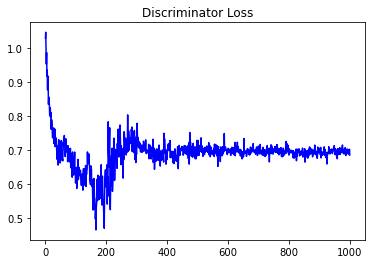

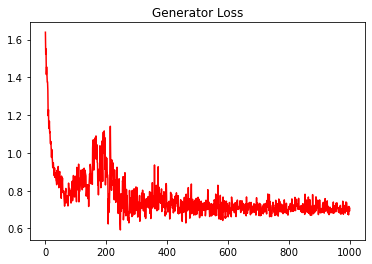

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.9106225487776101


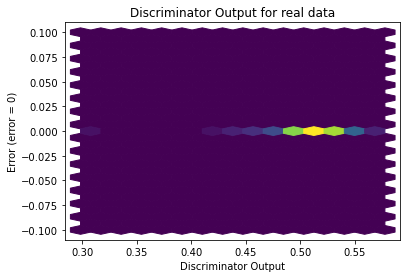

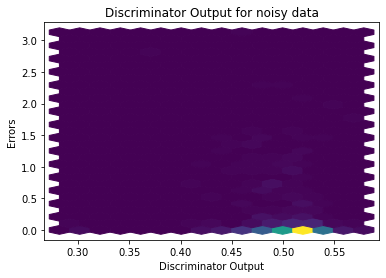

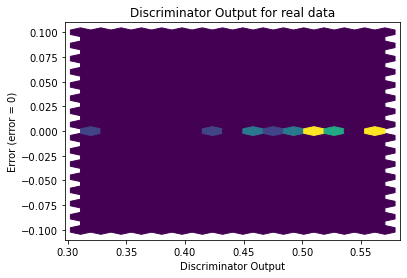

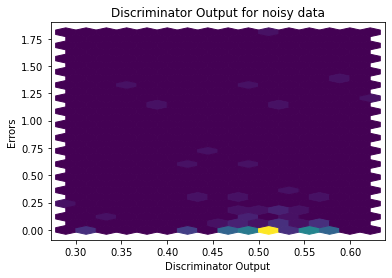

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

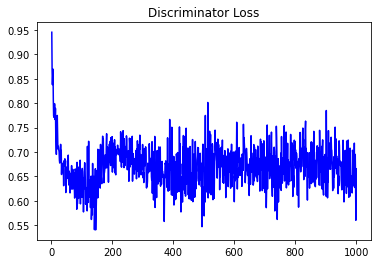

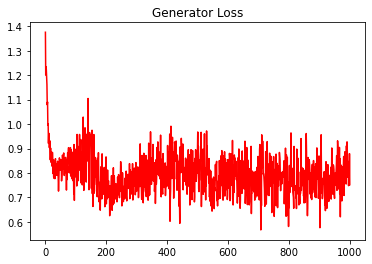

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
1.4087846335023642


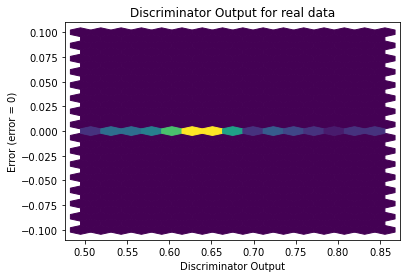

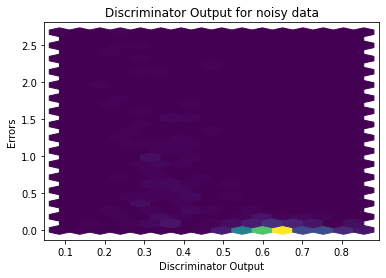

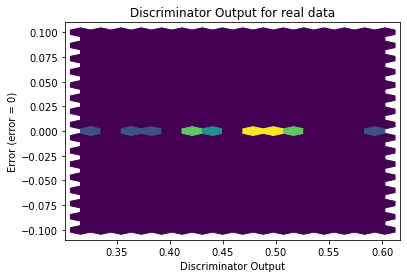

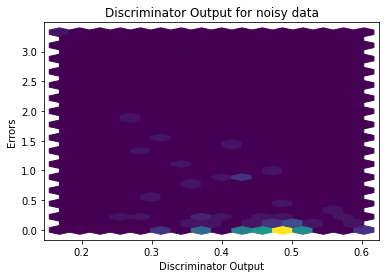

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


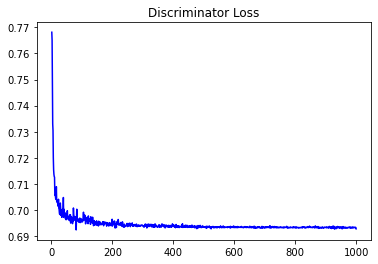

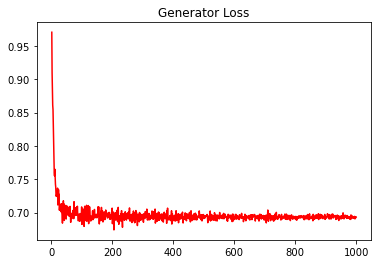

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.7405131876468658


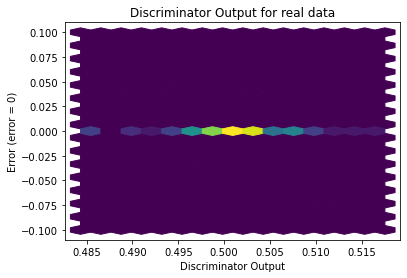

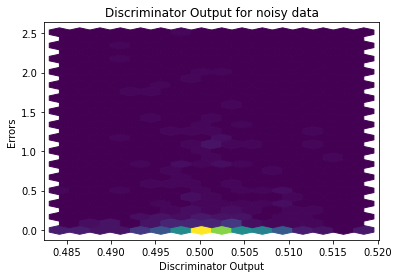

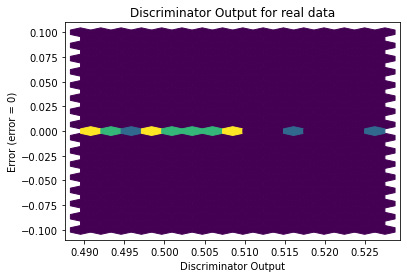

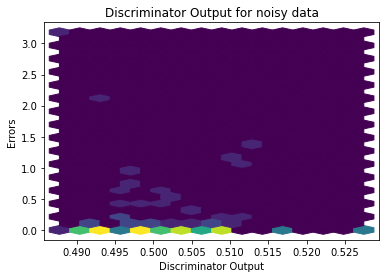

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


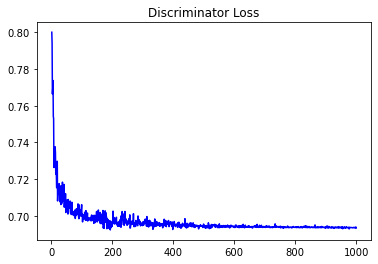

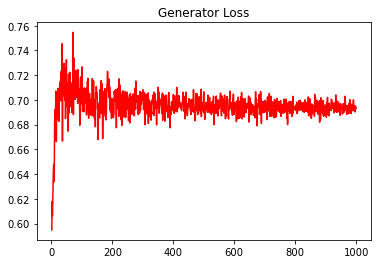

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
1.1663595069199801


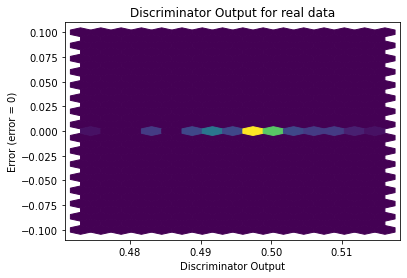

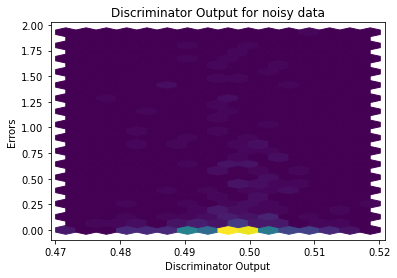

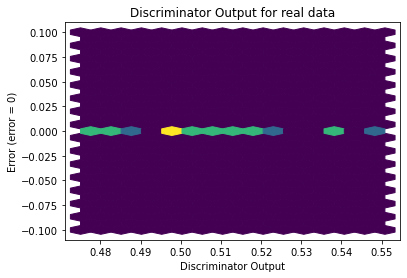

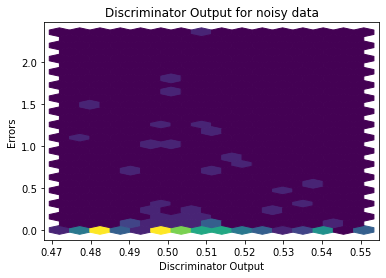

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5769]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0079]], requires_grad=True)
